# Lecture 17 - Random Numbers in Python & Monte Carlo - HW 8

## 1) Random Numbers and Radio Activity

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and
half-lives thus

<img src="Decay9.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />

(Technically, $^{209}$Bi isnt really stable, but it has a half-life of more than $10^{19}$ years, a billion
times the age of the universe, so it might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi, simulate the decay of the atoms
by dividing time into slices of length $\delta t = 1$s each and on each step doing
the following:

1. For each atom of $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not. (The probability can be calculated from $p(t) = 1 − 2t/\tau $, where $\tau$ is the half life.) Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.

2. Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.

3. For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top,
to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for 20,000 seconds
and make a single graph showing the four numbers as a function of time on the same axes.



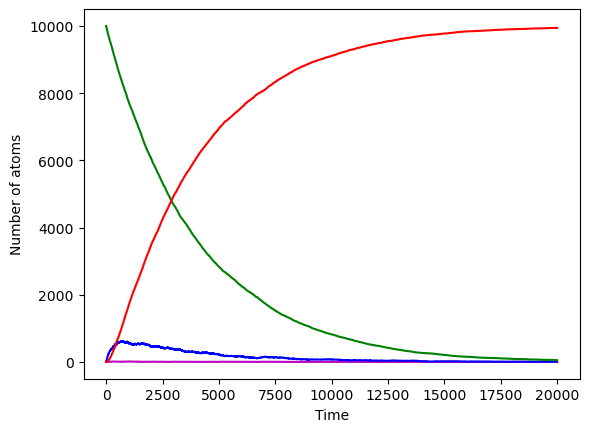

The max number of Thalium atoms is 13


In [25]:
# Write Code Here
import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NTl = 0              # Initial Number of thallium atoms
NPb = 0                 # Number of lead atoms
NBi213 = 10000                 # Number of Bi213 atoms
NBi209 = 0
tauPb = 3.3*60          # Half life of thallium in seconds
tauTl = 2.2*60
tauBi = 46*60
h = 1.0                 # Size of time-step in seconds
pPb = 1 - 2**(-h/tauPb) # Probability of lead decay in one step
pTl = 1- 2**(-h/tauTl)         # P
pBi213 = 1- 2**(-h/tauBi) 
tmax = 20000             # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Tlpoints = [] # empty array to strore # of Tl atoms at each time step
Pbpoints = [] # empty array to strore # of Pb atoms at each time step
Bi213points = [] # empty array to strore # of Bi atoms at each time step
Bi209points = [] # empty array to strore # of Bi atoms at each time step


# Main loop
for t in tpoints:    # for time 0-1000 sec
    Tlpoints.append(NTl) # append starting # of Tl atoms
    Pbpoints.append(NPb) # append starting # of Pb atoms
    Bi213points.append(NBi213)
    Bi209points.append(NBi209)

    # Calculate the number of atoms that decay
    decayPb = 0
    decayTl = 0
    decayBiToPb = 0
    decayBiToTl = 0
    for i in range(NPb): # determine number of atoms that decay
        if np.random.random() < pPb:
            decayPb += 1
    for i in range(NTl):
        if np.random.random() < pTl:
            decayTl += 1
    for i in range(NBi213):
        if np.random.random() < pBi213:
            if np.random.random() < 0.9791:
                decayBiToPb += 1    
            else:
                decayBiToTl +=1
            
    NTl = NTl + decayBiToTl - decayTl # subtract number of decayed Parent atoms 
    NPb = NPb + decayBiToPb + decayTl - decayPb # add number of decayed Daughter atoms
    NBi213 = NBi213 - decayBiToTl - decayBiToPb
    NBi209 = NBi209 + decayPb

# Make the graph
plot(tpoints,Tlpoints, c='m') # plot Tl vs. time
plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
plot(tpoints,Bi213points, c='g') # plot Bi213 vs. time
plot(tpoints,Bi209points, c='r') # plot Bi209 vs. time
xlabel("Time")
ylabel("Number of atoms")
show()
print("The max number of Thalium atoms is " + str(max(Tlpoints)))

## 2) Lets Make a Deal
Monte Carlo methods are often useful to ensure that our thinking is reasonable. A good
example of this kind of use is to investigate a simple problem that generated much attention
several years ago and for which many mathematicians obtained an incorrect solution.

The problem was the analysis of the optimal strategy in a television game show popular at
the time. The show was Lets Make a Deal with host Monty Hall. At some point in the show,
a contestant was given a choice of selecting one of three possible items, each concealed behind
one of three closed doors. The items varied considerably in value.

After the contestant made a choice but before the chosen door was opened, the
host, who knew where the most valuable item was, would open one of the doors
not selected and reveal a worthless item.

**The host would then offer to let the contestant select a different door from what was originally
selected. The question, of course, is should the contestant switch?**

<img src="Monty_Hall_Problem.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />



Much interest in this problem was generated when it was analyzed by a popular magazine
writer, Marilyn vos Savant, who concluded that the optimal strategy is to switch. This
strategy is counterintuitive to many mathematicians, who would say that there is nothing to
be gained by switching; that is, that the probability of improving the selection is 0.5. Study
this problem by Monte Carlo methods. Be careful to understand all of the assumptions

**Write a code that implement this test for 1000 “games”, 500 where the contestant choose to KEEP their choice of door, and 500 where contestant chooses to CHANGE their choice of door:**


## Determine if there is probability of improving the selection by switching, and if so by how much?



In [50]:
# Write Code Here
# contestantChoice = np.randint(1,4)
# reveal = 0
# if consestantChoice == 1:
#     reveal = np.randint(2,4)
# elif contestantChoice == 2:
#     reveal == 3
# else:
#     reveal == 2

#This will be test code for contestant switching
contestantChoice = np.random.randint(1,4)
reveal = 0
numWins = 0
numLoss = 0
for l in range(500):
    contestantChoice = np.random.randint(1,4)
    if contestantChoice == 1:
        numWins += 1
    else:
        numLoss += 1
        
winPercent = numWins / (numWins + numLoss) * 100
print("For games where the contestant did not switch they: ")
print("won: " + str(numWins) + "; lost: " + str(numLoss)) 
print('with a win percent of ' + str(round(winPercent,1)) + "%")

umWins = 0 
numLoss = 0

for l in range(500):
    contestantChoice = np.random.randint(1,4)
    if contestantChoice == 1:
        reveal = np.random.randint(2,4)
        numLoss += 1
    elif contestantChoice == 2:
        reveal == 3
        numWins +=1
    else:
        reveal == 2
        contestantChoice =1
        numWins += 1
    winPercent = numWins / (numWins + numLoss) * 100
print("For games where the contestant swiched they: ")
print("won: " + str(numWins) + "; lost: " + str(numLoss)) 
print('with a win percent of ' + str(round(winPercent,1)) + "%")

For games where the contestant did not switch they: 
won: 157; lost: 343
with a win percent of 31.4%
For games where the contestant swiched they: 
won: 495; lost: 162
with a win percent of 75.3%
